# **Daily Challenge. Interactive Data Visualization**

# **Perform basic data cleaning and preprocessing**

In [30]:
import pandas as pd
data=pd.read_excel('US Superstore data.xls')
data= data.to_csv('US Superstore data.csv')
data=pd.read_csv('US Superstore data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9994 non-null   int64  
 1   Row ID         9994 non-null   int64  
 2   Order ID       9994 non-null   object 
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [31]:
data.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [32]:
for column in ['Sales']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [33]:
data=data.drop(['Unnamed: 0','Row ID'],axis=1)

In [34]:
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8827 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8827 non-null   object        
 1   Order Date     8827 non-null   datetime64[ns]
 2   Ship Date      8827 non-null   datetime64[ns]
 3   Ship Mode      8827 non-null   object        
 4   Customer ID    8827 non-null   object        
 5   Customer Name  8827 non-null   object        
 6   Segment        8827 non-null   object        
 7   Country        8827 non-null   object        
 8   City           8827 non-null   object        
 9   State          8827 non-null   object        
 10  Postal Code    8827 non-null   int64         
 11  Region         8827 non-null   object        
 12  Product ID     8827 non-null   object        
 13  Category       8827 non-null   object        
 14  Sub-Category   8827 non-null   object        
 15  Product Name   8827 non-nu

In [35]:
data=data.drop_duplicates()

# **Data Visualization with Matplotlib**

In [36]:
data['Year']=data['Order Date'].dt.strftime('%Y')
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2014
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2014


# **sales trends over the years**

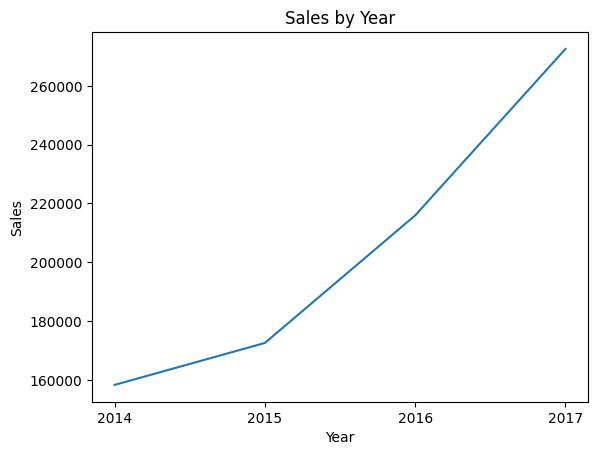

In [37]:
import matplotlib.pyplot as plt
#convert Year to int
data['Year']=data['Year'].astype(int)

#group sales by year and reset index
data2=data.groupby('Year')['Sales'].sum().reset_index()

data2.head()


plt.plot(data2['Year'],data2['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Year')
#the whole numbers in the x:
plt.xticks(data2['Year'])
plt.show()

# **sales distribution by country**

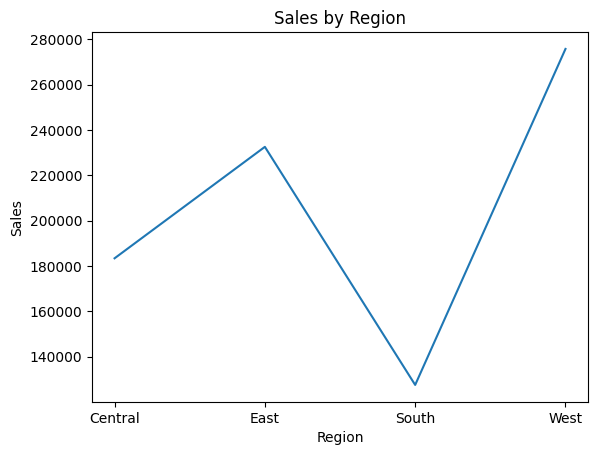

In [38]:
import matplotlib.pyplot as plt
#group sales by Region and reset index
data3=data.groupby('Region')['Sales'].sum().reset_index()

data3.head()


plt.plot(data3['Region'],data3['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region')
#the whole numbers in the y:
plt.xticks(data3['Region'])
plt.show()

<ipython-input-39-9913c33b1b0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Name', data=data4, palette='Blues_r')


<Axes: xlabel='Sales', ylabel='Product Name'>

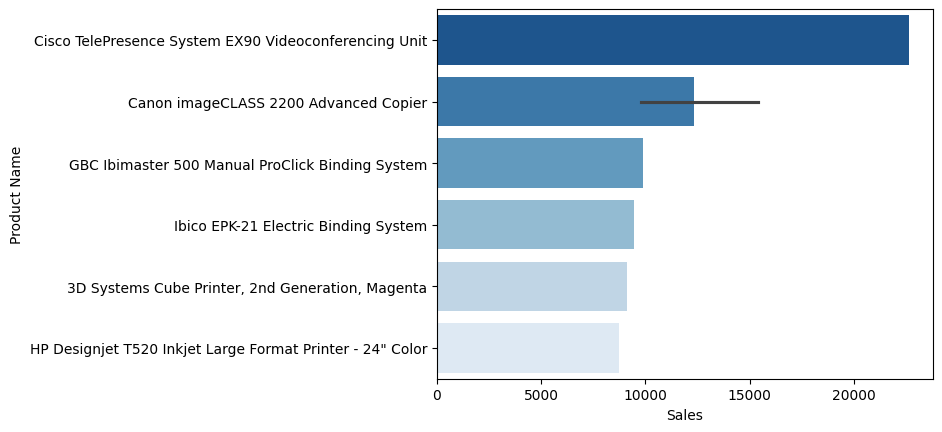

In [39]:
import seaborn as sns
import pandas as pd

data4 = pd.read_csv('US Superstore data.csv')
data4 = data4.sort_values(by='Sales', ascending=False).head(10)
sns.barplot(x='Sales', y='Product Name', data=data4, palette='Blues_r')



<Axes: xlabel='Profit', ylabel='Discount'>

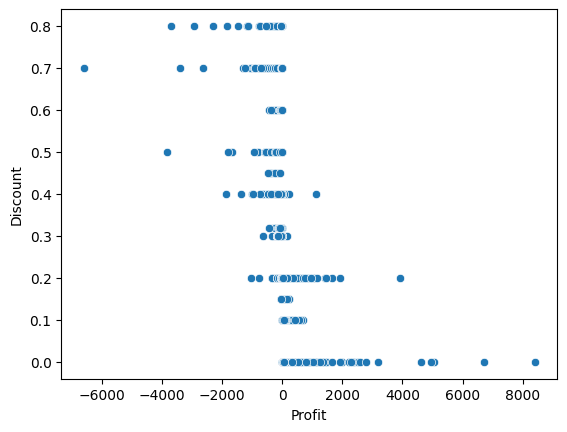

In [41]:
import seaborn as sns
import pandas as pd

data4 = pd.read_csv('US Superstore data.csv')
#Create a scatter plot to analyze the relationship between profit and discount.
sns.scatterplot(x='Profit', y='Discount', data=data4)



#From the analysis of the sales over the years we can see the sales increased over time. The growth was sharp between 2016 and 2017, which can be because of many reasons, like new products, new markets etc.

#The south region had the lowest sales while the West had the highest. But it will be important to consider also population and market saturation.

#The most sold product was the Cisco TelePresence and the least sold product was the HP Printer, maybe because of the high digitalization of the world in the last years.

#In the scatter plot we can see that the profit becomes negative when the discount increase. So there needs to be an analysis because although the discount can improve the sales, is les profitable. There is presence of some outliers which indicate that there are certain products that fall outside the normal trends, and is not so relevant to analyze them.

#Matplotlib is useful for analizing over the time, while Seaborn helped in more complex visualizations to perform statiscal analysis and relationship between variables.